In [66]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [67]:
#Reading file
train = pd.read_csv("/home/ayush/Downloads/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis and Cleaning

<AxesSubplot:>

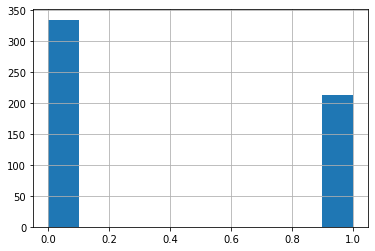

In [68]:
train["Survived"].hist()

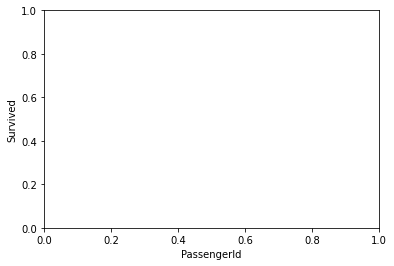

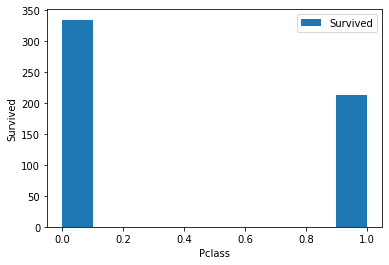

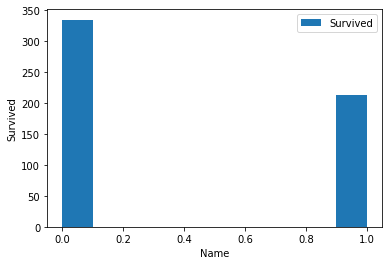

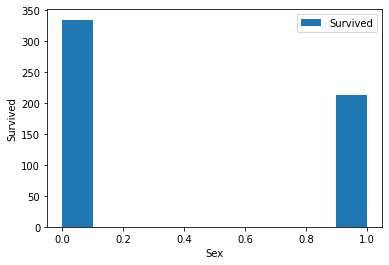

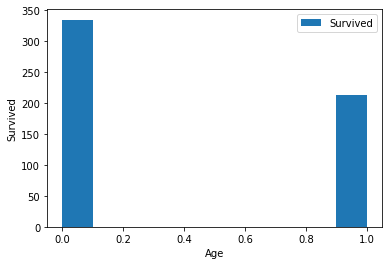

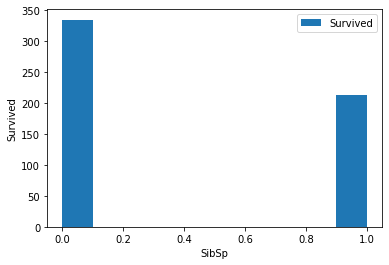

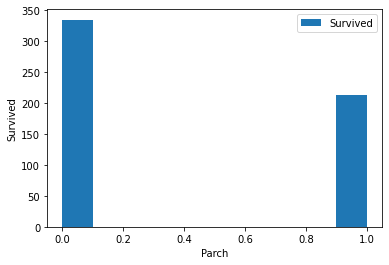

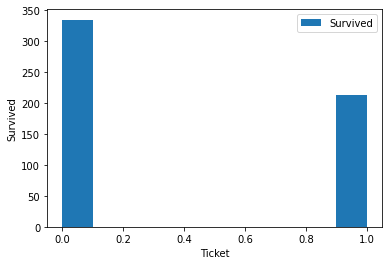

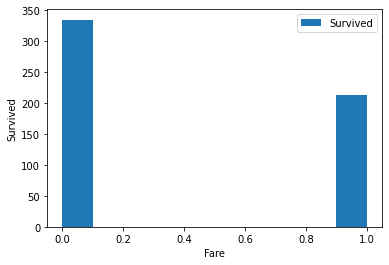

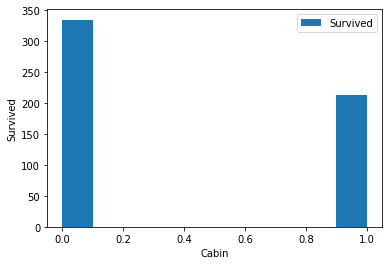

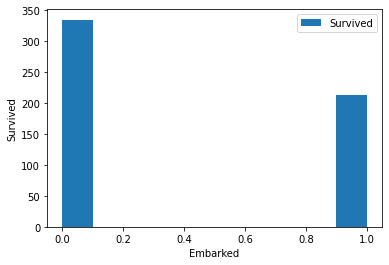

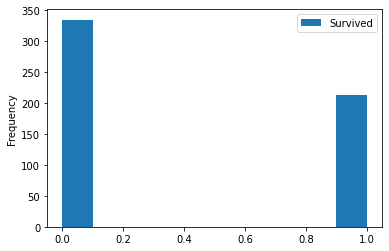

In [69]:
for col in train.columns:
    if(col!='Survived'):
        plt.xlabel(col)
        plt.ylabel('Survived')
        train.plot(x=col, y='Survived',kind='hist')

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            113
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          424
Embarked         1
dtype: int64

In [71]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [72]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
544,0,1,male,50.0,1,0,106.4250,C
545,0,1,male,64.0,0,0,26.0000,S
546,1,2,female,19.0,1,0,26.0000,S
547,1,2,male,NaN,0,0,13.8625,C


In [73]:
for col in train.columns:
    print(col, len(train[col].unique()))

Survived 2
Pclass 3
Sex 2
Age 78
SibSp 7
Parch 6
Fare 204
Embarked 4


In [74]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         113
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [75]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [76]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
dtype: int64

In [77]:
train.shape

(549, 8)

In [78]:
train.dropna(inplace=True)
train.shape

(548, 8)

In [79]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
for col in train.columns:
    print(col, len(train[col].unique()))

Survived 2
Pclass 3
Sex 2
Age 77
SibSp 7
Parch 6
Fare 203
Embarked 3


In [81]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
544,1
545,1
546,0
547,1


In [82]:
embk = pd.get_dummies(train['Embarked'],drop_first = True)
embk

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
544,0,0
545,0,1
546,0,1
547,0,0


In [83]:
pc = pd.get_dummies(train['Pclass'],drop_first = True)
pc

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
544,0,0
545,0,0
546,1,0
547,1,0


In [84]:
train.drop(['Sex', 'Pclass', 'Embarked'], inplace=True, axis=1)
train

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
544,0,50.0,1,0,106.4250
545,0,64.0,0,0,26.0000
546,1,19.0,1,0,26.0000
547,1,28.0,0,0,13.8625


In [85]:
train = pd.concat([train,sex,embk,pc],axis=1)

In [86]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Training dataset

In [196]:
y_train = train['Survived']
x_train = train.drop(['Survived'], axis =1)

In [197]:
y = y_train.to_numpy()
x = x_train.to_numpy()
theta = np.zeros((9,))
rows, col = x.shape

In [198]:
hypothesis = np.array((899,1))
hypothesis = 1.0/(1+np.exp(-np.dot(x,theta)))
m = rows
cost_function = (-1/m)*(np.dot(y,np.log(hypothesis))+(np.dot((1-y),np.log(1-hypothesis))))
hypothesis= hypothesis.reshape((hypothesis.shape[0])) #to reshape since matrix was giving 899*899


In [199]:
differ = np.dot(np.transpose(hypothesis-y),x)
differ

array([ 2.081500e+03,  5.100000e+01,  4.500000e+00, -6.016252e+02,
        1.115000e+02,  1.000000e+00,  6.200000e+01, -5.000000e-01,
        7.050000e+01])

In [200]:
iteration = 10000
learning_rate =0.01
for i in range(iteration):
    theta = theta - ((differ)*(learning_rate/m))

In [201]:
theta

array([-3.79835766e+02, -9.30656934e+00, -8.21167883e-01,  1.09785620e+02,
       -2.03467153e+01, -1.82481752e-01, -1.13138686e+01,  9.12408759e-02,
       -1.28649635e+01])

In [202]:
val = ((-1/m)*(np.dot(y,np.log(hypothesis))+(np.dot((1-y),np.log(1-hypothesis)))))
val

0.6931471805599453

# Test Data


In [203]:
test = pd.read_csv("/home/ayush/Downloads/test.csv")
test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)
test.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,male,8.0,1,1,36.7500,S
1,1,1,male,17.0,0,2,110.8833,C
2,0,2,male,27.0,0,0,26.0000,S
3,0,3,male,NaN,0,0,7.8292,Q
4,1,3,male,22.0,0,0,7.2250,C


In [204]:
test.shape

(342, 8)

In [205]:
for col in test.columns:
    print(col, len(test[col].unique()))

Survived 2
Pclass 3
Sex 2
Age 69
SibSp 7
Parch 7
Fare 144
Embarked 4


In [206]:
test.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         64
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [207]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test.shape

(342, 8)

In [208]:
test.dropna(inplace=True)
test.shape

(341, 8)

In [209]:
embk = pd.get_dummies(test['Embarked'],drop_first = True)
embk

,Q,S
0,0,1
1,0,0
2,0,1
3,1,0
4,0,0
...,...,...
337,0,1
338,0,1
339,0,1
340,0,0


In [210]:
sex = pd.get_dummies(test['Sex'],drop_first = True)
sex

,male
0,1
1,1
2,1
3,1
4,1
...,...
337,1
338,0
339,0
340,1


In [211]:
pc = pd.get_dummies(test['Pclass'],drop_first = True)
pc

,2,3
0,1,0
1,0,0
2,1,0
3,0,1
4,0,1
...,...,...
337,1,0
338,0,0
339,0,1
340,0,0


In [212]:
test.drop(['Sex', 'Pclass', 'Embarked'], inplace=True, axis=1)
test

,Survived,Age,SibSp,Parch,Fare
0,1,8.0,1,1,36.7500
1,1,17.0,0,2,110.8833
2,0,27.0,0,0,26.0000
3,0,29.0,0,0,7.8292
4,1,22.0,0,0,7.2250
...,...,...,...,...,...
337,0,27.0,0,0,13.0000
338,1,19.0,0,0,30.0000
339,0,29.0,1,2,23.4500
340,1,26.0,0,0,30.0000


In [213]:
test = pd.concat([test,sex,embk,pc],axis=1)
test

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,8.0,1,1,36.7500,1,0,1,1,0
1,1,17.0,0,2,110.8833,1,0,0,0,0
2,0,27.0,0,0,26.0000,1,0,1,1,0
3,0,29.0,0,0,7.8292,1,1,0,0,1
4,1,22.0,0,0,7.2250,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
337,0,27.0,0,0,13.0000,1,0,1,1,0
338,1,19.0,0,0,30.0000,0,0,1,0,0
339,0,29.0,1,2,23.4500,0,0,1,0,1
340,1,26.0,0,0,30.0000,1,0,0,0,0


# prediciting

In [214]:
y_test = test['Survived']
test.drop(['Survived'], inplace=True, axis=1)
x_test = test
probab = x_test.to_numpy(dtype=np.float128)
y = y_test.to_numpy()


In [215]:
probab.shape

(341, 9)

In [216]:
hypothesis = 1.0/(1+np.exp(-np.dot(probab,theta)))
hypothesis

/home/ayush/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([1.00000000e+0000, 1.00000000e+0000, 1.03642270e-3228,
       8.53191863e-4426, 8.44330989e-3300, 1.18314302e-3269,
       0.00000000e+0000, 0.00000000e+0000, 1.00000000e+0000,
       7.60136316e-2646, 0.00000000e+0000, 1.42839067e-4429,
       0.00000000e+0000, 1.15836433e-3989, 4.21050182e-4420,
       2.88934932e-4411, 9.55416338e-2836, 7.55025021e-2778,
       1.14031934e-3791, 2.52769130e-4454, 2.55268298e-4924,
       0.00000000e+0000, 0.00000000e+0000, 6.40382669e-4695,
       9.80196611e-4421, 1.29371881e-2275, 5.77461106e-2463,
       0.00000000e+0000, 7.15159455e-3778, 7.51186368e-4105,
       6.06304169e-4921, 1.23564605e-2703, 9.46202196e-1152,
       0.00000000e+0000, 5.17875010e-4035, 1.33479210e-4383,
       1.00000000e+0000, 0.00000000e+0000, 0.00000000e+0000,
       2.23036309e-3265, 4.21050182e-4420, 0.00000000e+0000,
       5.11451148e-4851, 0.00000000e+0000, 1.89694979e-4421,
       2.33330405e-4882, 1.37539376e-4811, 4.85145911e-3216,
       0.00000000e+0000,

In [222]:
prediction = np.empty([341,1])

In [223]:
prediction.shape

(341, 1)

In [224]:
i =0
for val in hypothesis:
    if val>0.5:
        prediction[i] = 1
        i=i+1
    else:
        prediction[i] =0
        i=i+1

In [225]:
prediction

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],